In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
path = (base_dir + 'data')
print(path)

/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data


In [6]:
## enable this to move files from 'images' to 'test'
# import os

# df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/test_vc2kHdQ.csv')

# for i in range(len(df)):
#   if(os.path.isfile("/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/train_SOaYf6m/images/"+df.loc[i, "image_names"])):
#     os.rename("/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/train_SOaYf6m/images/"+df.loc[i, "image_names"], 
#               "/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/test/"+df.loc[i, "image_names"])
# print(i)

In [7]:
np.random.seed(42)
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_lighting=0.3)

In [8]:
data = ImageDataBunch.from_csv(path=('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data'), 
                                folder='train_SOaYf6m/images', test = 'test', csv_labels='train.csv', valid_pct=0.2, fn_col=0, label_col=1, header=1,
                                ds_tfms = tfms, size = 128, bs = bs).normalize(imagenet_stats)

In [9]:
# data = ImageDataBunch.from_csv(path=('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data'), 
#                                folder='train_SOaYf6m/images', csv_labels='train.csv', valid_pct=0.2, fn_col=0, label_col=1, header=1,
#                                ds_tfms = tfms, size = 64, bs = bs).normalize(imagenet_stats)
# data.add_test_folder('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data')

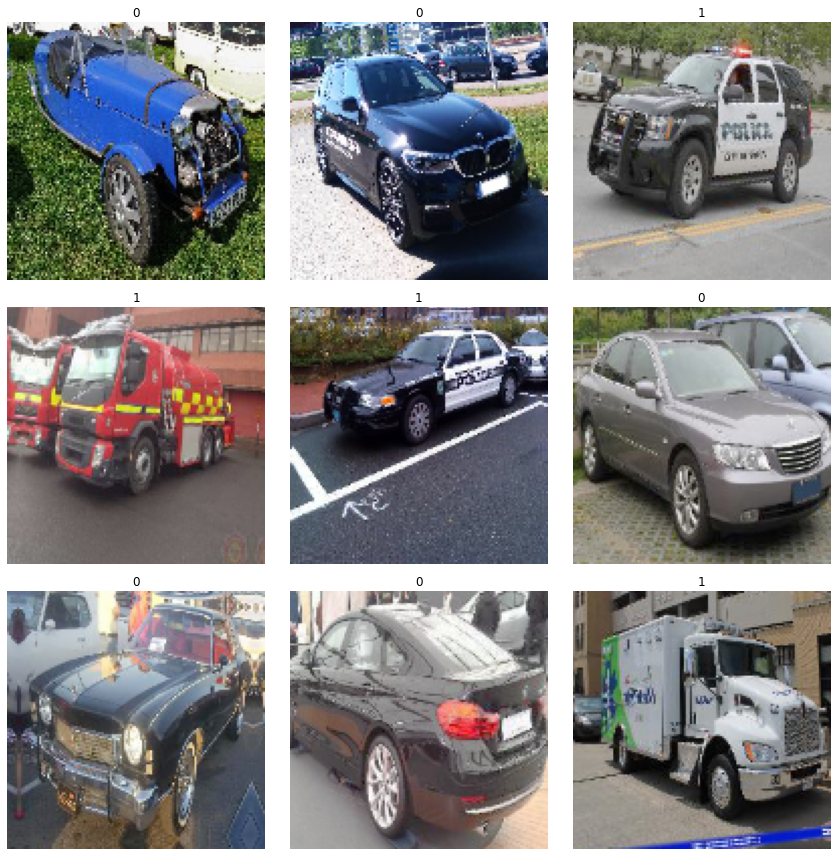

In [10]:
data.show_batch(rows=3, figsize=(12,12))

In [11]:
print(data.classes)
len(data.classes),data.c

[0, 1]


(2, 2)

In [12]:
# learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn = cnn_learner(data, models.resnet152, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [ ]:
learn.model

In [14]:
learn.fit_one_cycle(6) #15

epoch,train_loss,valid_loss,accuracy,time
0,0.687571,0.569109,0.899696,06:07
1,0.574569,0.563994,0.881459,00:17
2,0.457975,0.391501,0.902736,00:10
3,0.364608,0.328365,0.911854,00:10
4,0.296077,0.303192,0.920973,00:10
5,0.243207,0.306225,0.917933,00:10


In [15]:
# learn.save('stage-1-resnet34')
# learn.save('stage-1-resnet50')
learn.save('stage-1-resnet152')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
# len(data.valid_ds)==len(losses)==len(idxs)

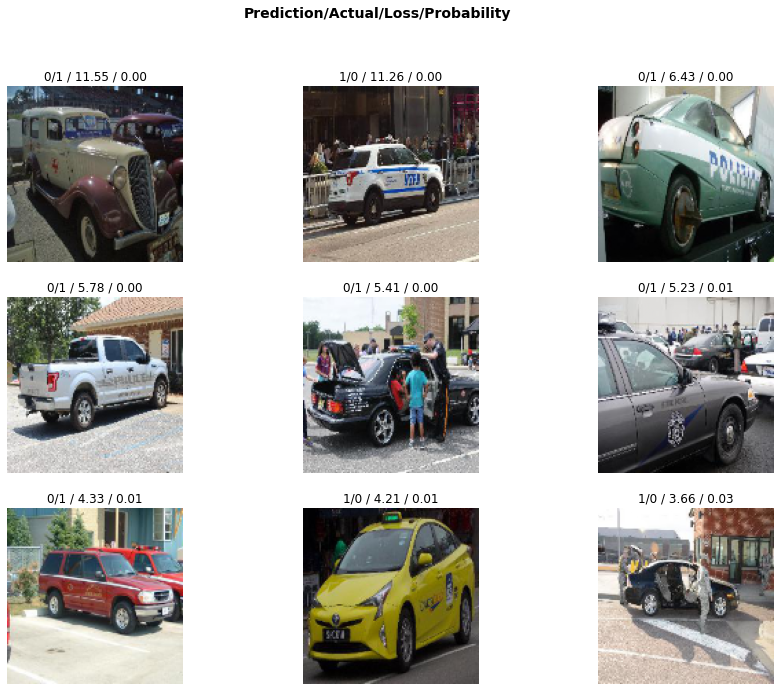

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

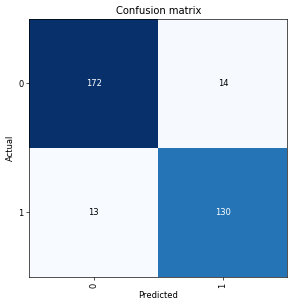

In [18]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [20]:
learn = cnn_learner(data, models.resnet152, metrics=[accuracy]).load('stage-1-resnet152')
# learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).load('stage-1-resnet50')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


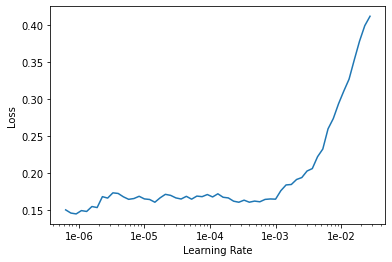

In [19]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(6, max_lr=slice(2e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.144664,0.304406,0.924012,00:11
1,0.142511,0.361569,0.917933,00:11
2,0.130873,0.356824,0.927052,00:11
3,0.107790,0.297870,0.936170,00:11
4,0.085748,0.285697,0.939210,00:11
5,0.071867,0.288886,0.939210,00:11


In [21]:
learn.save('stage-2-resnet152')

In [ ]:
# data2 = ImageDataBunch.from_csv(path=('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data'), 
#                                 folder='train_SOaYf6m/images', test = 'test', csv_labels='train.csv', valid_pct=0.2, fn_col=0, label_col=1, header=1,
#                                 ds_tfms = tfms, size = 128, bs = bs).normalize(imagenet_stats)

In [ ]:
# load the saved learner
# learn = cnn_learner(data2, models.resnet34, metrics=[accuracy]).load('stage-1-resnet34')

In [ ]:
# learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,time
0,0.199766,#na#,00:09
1,0.197594,#na#,00:09
2,0.256658,#na#,00:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


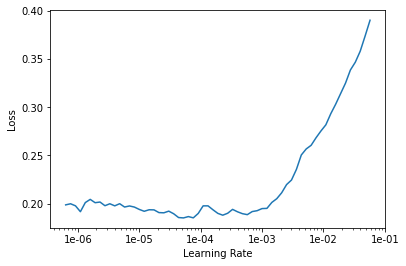

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-6,7e-5))

epoch,train_loss,valid_loss,time
0,0.199406,0.271155,00:11
1,0.175349,0.262135,00:10
2,0.175941,0.250450,00:10
3,0.171645,0.240110,00:10
4,0.164154,0.230767,00:10
5,0.148766,0.235672,00:10
6,0.136922,0.238376,00:10
7,0.129692,0.235915,00:10
8,0.122832,0.232712,00:10
9,0.115475,0.234467,00:10


In [ ]:
learn.save('stage-2_resnet34')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
# len(data.valid_ds)==len(losses)==len(idxs)

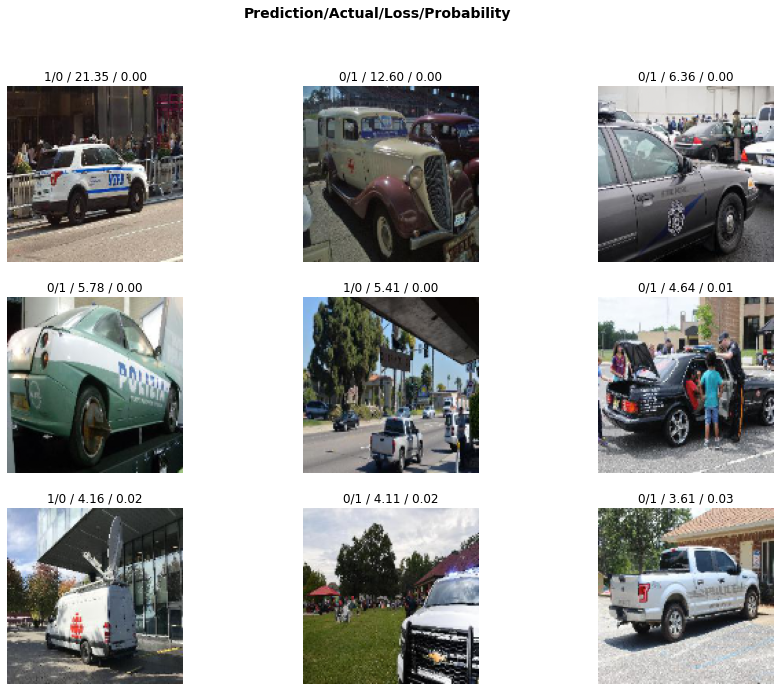

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

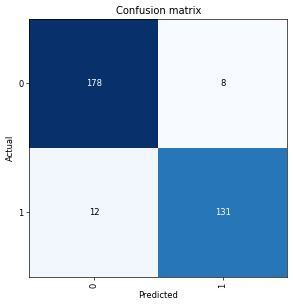

In [24]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [25]:
# identify files that are part of test set
test_data = []
test_idx = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/test_vc2kHdQ.csv')
train_idx = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/train.csv')
print(train_idx.head())
print(test_idx.head())
print(train_idx.shape)
print(test_idx.shape)

  image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0
3    1356.jpg                 0
4    1117.jpg                 0
  image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg
(1646, 2)
(706, 1)


In [26]:
print(0.8*1646)
len(data.test_ds)


1316.8000000000002


706

In [ ]:
# learn.data = data2

In [27]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)  
# preds, _ = learn.TTA(ds_type=DatasetType.Test) #TTA performs better

labels = np.argmax(preds, 1)
test_predictions_direct = [data.classes[int(x)] for x in labels]
fnames = [str(x)[str(x).rfind('/')+1:] for x in data.test_ds.items[:]]

In [29]:
df_final = pd.DataFrame(list(zip(fnames, test_predictions_direct)), 
               columns =['image_names', 'emergency_or_not']) 
df_final.head()

,image_names,emergency_or_not
0,100.jpg,1
1,1000.jpg,0
2,1001.jpg,0
3,1004.jpg,0
4,1014.jpg,0


In [30]:
df_final.to_csv('/content/gdrive/My Drive/Colab Notebooks/Emerg_vs_NonEmerg_Vehicle/data/submission3.csv', index=False)

In [31]:
print (preds[0])
print (test_predictions_direct[0:5])
accuracy(interp.preds, interp.y_true)

tensor([0.0397, 0.9603])
[1, 0, 0, 0, 0]


tensor(0.9119)